In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import urllib.request
import os
%matplotlib inline

pd.set_option('display.max_rows', 300)

import warnings
warnings.filterwarnings('ignore')

# 1.读取数据集

In [6]:
#!pip install xlrd

In [45]:
 # 读取数据文件，结果为DataFrame格式
df_data = pd.read_excel("./datas/titanic3.xls")

# 2.筛选提取字段

survival（是否生存）是标签字段，其他是候选特征字段

筛选提取需要的特征字段，去掉ticket，cabin等

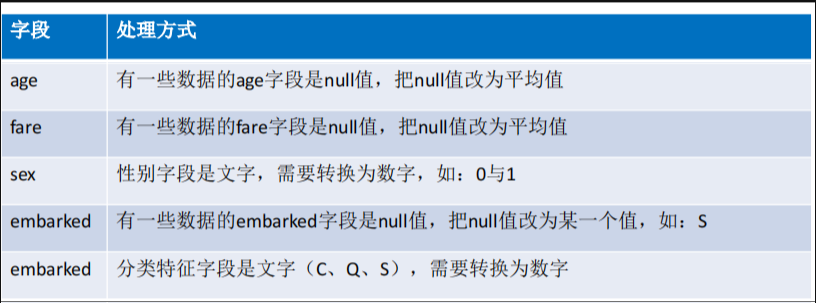

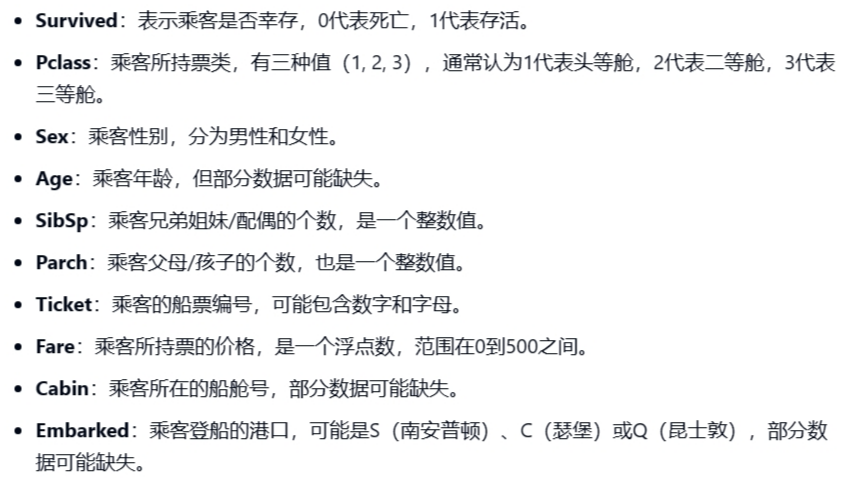

In [59]:
# 筛选提取字段
selected_cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
selected_df_data=df_data[selected_cols]
display (selected_df_data.head(5))

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


In [17]:
selected_df_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.381971,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.486055,0.837836,14.413500,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
selected_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   name      1309 non-null   object 
 2   pclass    1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [19]:
selected_df_data['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

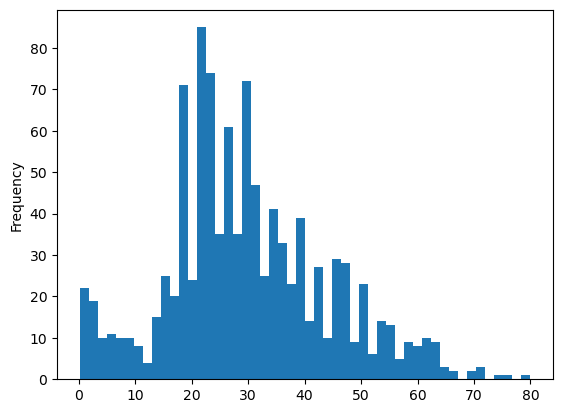

In [25]:
selected_df_data['age'].plot(kind='hist',bins=50)

<Axes: ylabel='Frequency'>

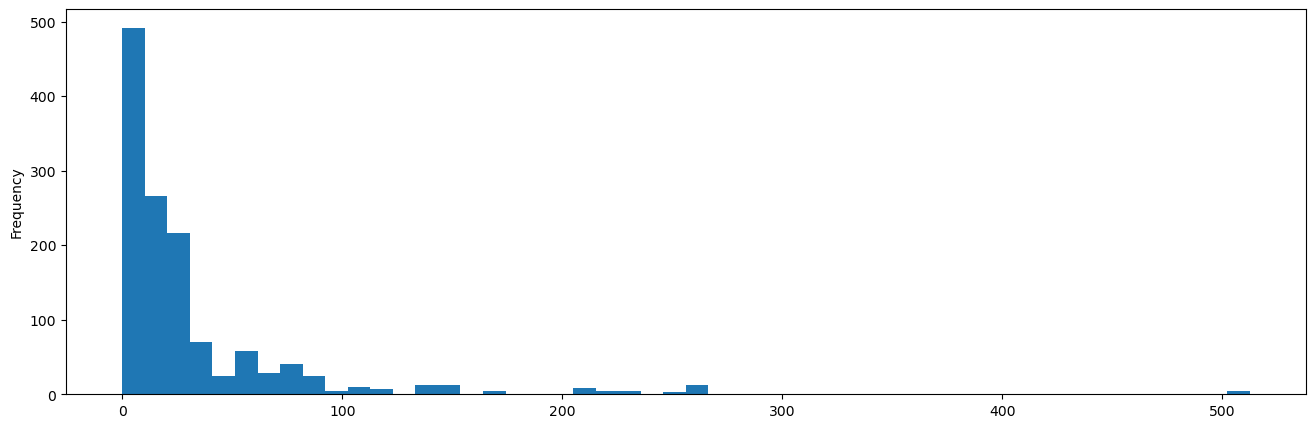

In [47]:
selected_df_data['fare'].plot(figsize=(16,5), kind='hist',bins=50)

# 3找出有null值的字段
Pandas判断缺失值一般采用 isnull()，生成所有数据的True／False矩阵

In [54]:
# 找出存在缺失值的"列"
selected_df_data.isnull().any()
selected_df_data.isnull().sum()
# selected_df_data[selected_df_data.isnull().values==True]

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

# 4.填充null值

In [55]:
selected_df_data['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [60]:
# 为缺失age记录填充值 设置为平均值
age_mean_value= selected_df_data['age'].mean()
selected_df_data['age'] = selected_df_data['age'].fillna(age_mean_value)
# 为缺失fare记录填充值
fare_mean_value=selected_df_data['fare'].mean()
selected_df_data['fare'] = selected_df_data['fare'].fillna(fare_mean_value)
#  为缺失embarked记录填充值
selected_df_data['embarked']=selected_df_data['embarked'].fillna('S')

# 5.转换编码

In [61]:
#  性别sex由字符串转换为数字编码
selected_df_data['sex'] = selected_df_data['sex'].map({'female':0,'male':1}).astype(int)
#  港口embarked由字母表示转换为数字编码
selected_df_data['embarked'] = selected_df_data['embarked'].map({'C':0,'Q':1,'S':2}).astype(int)
selected_df_data.sample(5)

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
81,0,"Crosby, Capt. Edward Gifford",1,1,70.000000,1,1,71.0000,2
1288,0,"Wiklund, Mr. Jakob Alfred",3,1,18.000000,1,0,6.4958,2
784,0,"Dyker, Mr. Adolf Fredrik",3,1,23.000000,1,0,13.9000,2
798,1,"Finoli, Mr. Luigi",3,1,29.881135,0,0,7.0500,2
704,0,"Cann, Mr. Ernest Charles",3,1,21.000000,0,0,8.0500,2


# 6.删除name字段

drop不改变原有的df中的数据，而是返回另一个DataFrame来存放删除后的数据

axis = 1 表示删除列


In [62]:
#  删除name字段
selected_df_data = selected_df_data.drop(['name'],axis=1)   # axis=1表示删除列
# 显示前3行数据
selected_df_data[:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,0,1,0,2.0000,1,2,151.5500,2


# 7.分离特征值和标签值

In [63]:
# 转换为ndarray数组
ndarray_data = selected_df_data.values
# 后7列是特征值
features = ndarray_data[:,1:]
# 第0列是标签值
label = ndarray_data[:,0]
print(features[:3])
print(label[:3])

[[  1.       0.      29.       0.       0.     211.3375   2.    ]
 [  1.       1.       0.9167   1.       2.     151.55     2.    ]
 [  1.       0.       2.       1.       2.     151.55     2.    ]]
[1. 1. 0.]


# 8.特征值标准化处理

In [64]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
norm_features = minmax_scale.fit_transform(features)
norm_features[:3]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 1.        ],
       [0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 1.        ]])

(array([492., 266., 217.,  71.,  25.,  58.,  28.,  40.,  24.,   4.,  10.,
          7.,   0.,  13.,  12.,   0.,   4.,   0.,   0.,   0.,   9.,   4.,
          5.,   0.,   3.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   4.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

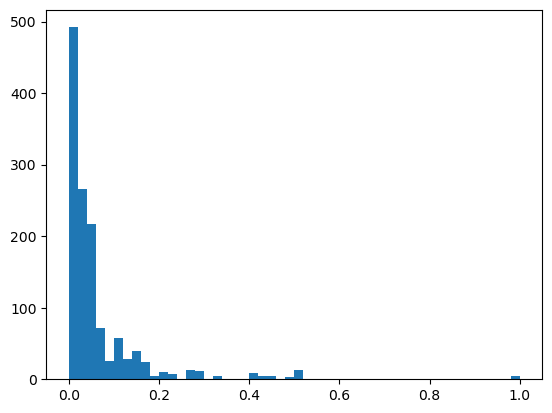

In [68]:
plt.hist(norm_features[:,-2],bins=50)

# 9. 定义数据预处理函数

把前面数据预处理的命令全部封装到prepare_data函数中，方便后面调用

In [15]:
# 定义数据预处理函数
from sklearn import preprocessing
def prepare_data(df_data):
    df = df_data.drop(['name'],axis=1) # 删除姓名列
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean) # 为缺失age记录填充值
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean) # 为缺失fare记录填充值
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int) # 把sex值由字符串转换为数值
    df['embarked'] = df['embarked'].fillna('S') # 为缺失embarked记录填充值
    df['embarked'] = df['embarked'].map({'C':0,'Q':1,'S':2}).astype(int) # 把embarked值由字符串转换为数值
    
    ndarray_data = df.values # 转换为ndarray数组
    features = ndarray_data[:,1:] # 后7列是特征值
    label = ndarray_data[:,0] # 第0列是标签值
    # 特征值标准化
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    norm_features = minmax_scale.fit_transform(features)
    
    return norm_features,label

# 数据读取和特征构造

* 导包

* 读取数据

* 查看数据
    * 数据集整体情况
    * 单个特征

* 缺失值填充
    * 均值
    * 众数
* 异常值处理
    * 归一化
    * 标准化
* 特征构造
    * 连续值：分箱，WOE，IV
    * 类别：onehot
    * 类别：数字编码
    * 类别：频数编码
    * 文本：TFIDF
    * 时间：时间差，窗口函数
* 特征选择 & 降维
    * 相关性
    * 卡方
    * PCA & LAD
* 特征和标签分离
* 训练集和测试集划分

------------------
* 工作量在60~70



In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 假设我们有以下的性别数据
data = {'Gender': ['Male', 'Female', 'Female', 'Male']}
df = pd.DataFrame(data)

# 创建LabelEncoder对象
encoder = LabelEncoder()

# 对性别进行标签编码
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])
print(df)

   Gender  Gender_encoded
0    Male               1
1  Female               0
2  Female               0
3    Male               1
